# Exploratory Data Analysis of lichess Chess Matches

My question is, what one of variables MOSTLY affect the game? Is it that White plays first, or is it the difference in rating?

In this project, I will answer this question.

## Data Loading and Statistics


In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_chess = pd.read_csv("games.csv")

In [3]:
# Convert Unix timestamps to datetime
df_chess['created_at'] = pd.to_datetime(df_chess['created_at'], unit='ms')
df_chess['last_move_at'] = pd.to_datetime(df_chess['last_move_at'], unit='ms')

In [4]:
df_chess

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,2017-08-31 20:06:40.000000000,2017-08-31 20:06:40.000000000,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,2017-08-30 16:20:00.000000000,2017-08-30 16:20:00.000000000,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,2017-08-29 18:06:40.000000000,2017-08-29 18:06:40.000000000,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,2017-07-11 16:35:14.342000128,2017-07-11 16:40:36.076000000,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,2017-07-10 14:48:09.760000000,2017-07-10 15:00:33.979000064,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,2017-07-10 14:44:37.492999936,2017-07-10 14:47:30.327000064,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,2017-07-10 14:15:27.019000064,2017-07-10 14:31:13.718000128,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


Let's explore the dataset to understand its structure and identify any interesting patterns or trends.

In [5]:
df_chess.shape

(20058, 16)

In [6]:
df_chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              20058 non-null  object        
 1   rated           20058 non-null  bool          
 2   created_at      20058 non-null  datetime64[ns]
 3   last_move_at    20058 non-null  datetime64[ns]
 4   turns           20058 non-null  int64         
 5   victory_status  20058 non-null  object        
 6   winner          20058 non-null  object        
 7   increment_code  20058 non-null  object        
 8   white_id        20058 non-null  object        
 9   white_rating    20058 non-null  int64         
 10  black_id        20058 non-null  object        
 11  black_rating    20058 non-null  int64         
 12  moves           20058 non-null  object        
 13  opening_eco     20058 non-null  object        
 14  opening_name    20058 non-null  object        
 15  op

In [7]:
df_chess.describe()

,turns,white_rating,black_rating,opening_ply
count,20058.000000,20058.000000,20058.000000,20058.000000
mean,60.465999,1596.631868,1588.831987,4.816981
std,33.570585,291.253376,291.036126,2.797152
min,1.000000,784.000000,789.000000,1.000000
25%,37.000000,1398.000000,1391.000000,3.000000
50%,55.000000,1567.000000,1562.000000,4.000000
75%,79.000000,1793.000000,1784.000000,6.000000
max,349.000000,2700.000000,2723.000000,28.000000


## Visualization of the Chess Dataset

In [9]:
df_chess['winner'].value_counts()

white    10001
black     9107
draw       950
Name: winner, dtype: int64

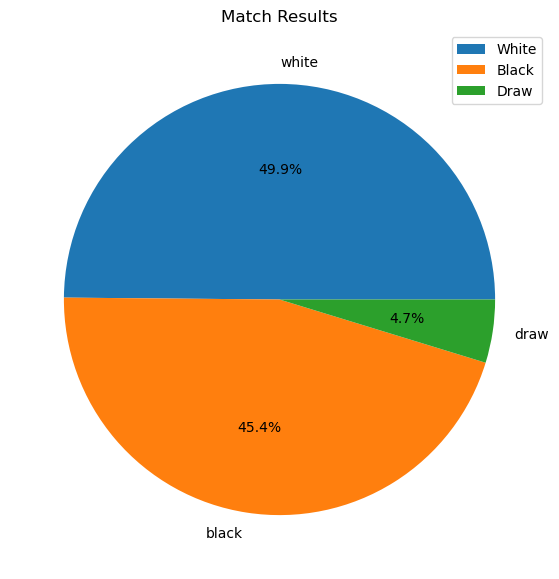

In [10]:
# Pie Chart of Match Results
winner_counts = df_chess['winner'].value_counts()

# Calculate percentages
total_games = len(df_chess) 
percentages = (winner_counts / total_games) * 100

plt.figure(figsize=(10, 7))
plt.pie(winner_counts, labels=winner_counts.index, autopct="%1.1f%%")  
plt.legend(['White', 'Black', 'Draw'])
plt.title("Match Results")
plt.show()

It's interesting to note that, on average, White wins more often than Black according to Lichess.com. 
Does this mean that White has more advantages than Black? Let's explore it!

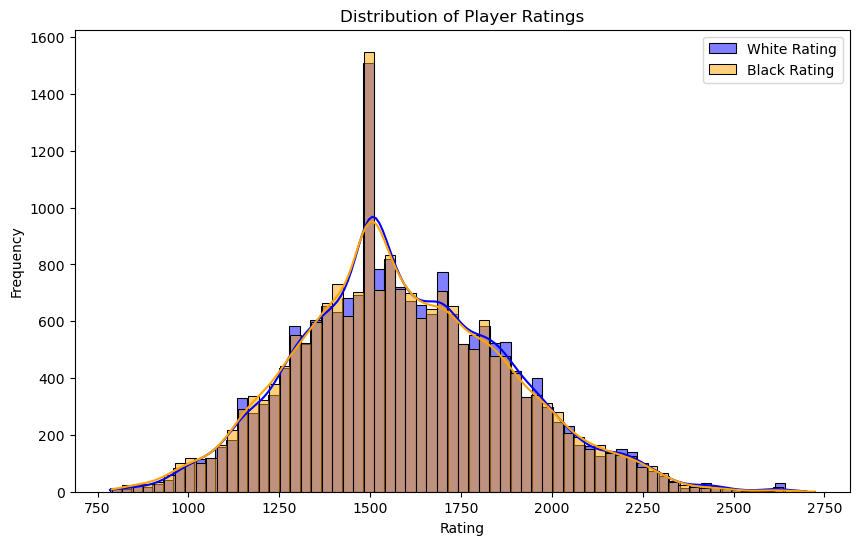

In [11]:
# Distribution of player ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_chess['white_rating'], kde=True, color='blue', label='White Rating')
sns.histplot(df_chess['black_rating'], kde=True, color='orange', label='Black Rating')
plt.title('Distribution of Player Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The mean of this distribution is approximately 1500, which is interesting because many people tend to say that the rating system on Lichess.org is less fair than on Chess.com. However, we can see that this rating is average according to the World Chess Federation (Class C, Category 3). So, it might be better for Chess.com to adjust their rating system and impose lighter penalties for losses.

In [13]:
# Create rating difference feature
df_chess['rating_difference'] = df_chess['white_rating'] - df_chess['black_rating']

df_rating = df_chess[["winner","white_rating","black_rating"]]
df_rating['winner_rating'] = None

# Assign the winner's rating based on the 'winner' column
df_rating.loc[df_rating['winner'] == 'white', 'winner_rating'] = df_rating['white_rating']
df_rating.loc[df_rating['winner'] == 'black', 'winner_rating'] = df_rating['black_rating']

# Calculate average rating for draws
df_rating.loc[df_rating['winner'] == 'draw', 'winner_rating'] = (df_rating['white_rating'] + df_rating['black_rating']) / 2

bins = [0, 1000, 1200, 1400, 1600, 1800, 2000, 2300, 2500, 2800]

labels = ['<1000', '1000-1199', '1200-1399', '1400-1599', '1600-1799', '1800-1999', '2000-2299', '2300-2499','2500>']
df_rating['rating_range'] = pd.cut(df_rating['winner_rating'], bins=bins, labels=labels, right=False)
new_df_rating = df_rating[["winner","rating_range"]]
new_df_rating

,winner,rating_range
0,white,1400-1599
1,black,1200-1399
2,white,1400-1599
3,white,1400-1599
4,white,1400-1599
...,...,...
20053,white,1600-1799
20054,black,1000-1199
20055,white,1200-1399
20056,white,1200-1399


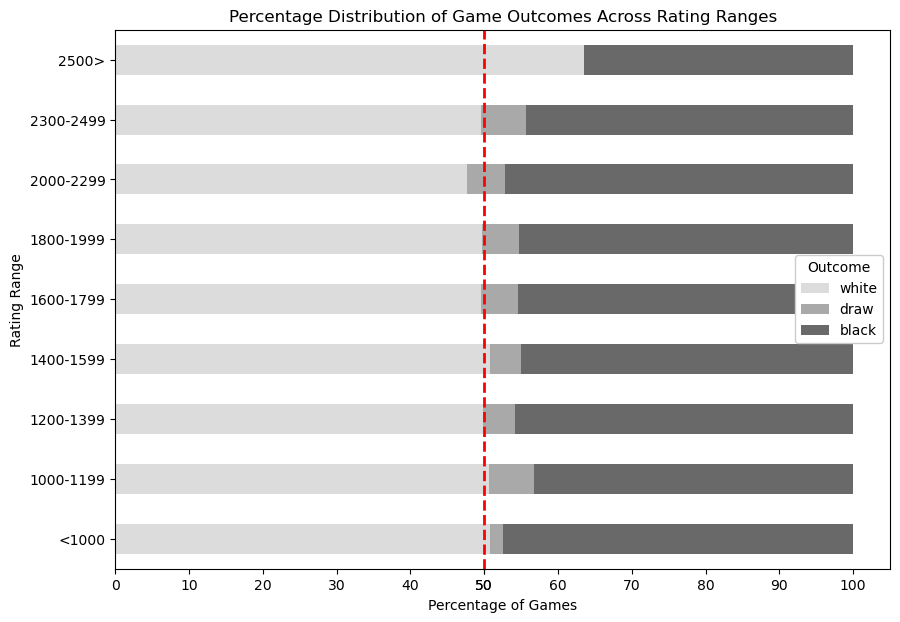

In [14]:
#Distribution of Game Outcomes Across Rating Ranges
count_data = new_df_rating.groupby(['rating_range', 'winner']).size().unstack().fillna(0)

count_data = count_data[['white', 'draw', 'black']]

percentage_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Plotting the stacked horizontal bar chart with percentages
ax = percentage_data.plot(kind='barh', stacked=True, figsize=(10, 7), color=['gainsboro', 'darkgrey', 'dimgray'])

plt.axvline(50, color='red', linestyle='--', lw=2)

plt.xticks(range(0, 101, 10))
plt.xticks(list(plt.xticks()[0]) + [50])
plt.xlabel('Percentage of Games')
plt.ylabel('Rating Range')
plt.title('Percentage Distribution of Game Outcomes Across Rating Ranges')
plt.legend(title='Outcome', facecolor='white', framealpha=1)
plt.show()

In [15]:
33/52 - 19/52

0.2692307692307692

It is interesting to note that, on average, across all rating ranges, White players win more often than Black. Also, there are dramatic changes for players with ratings above 2500, who tend to win about 0.27% more often when playing as White compared to Black.

In [16]:
df_rating_1=df_chess[["winner","rating_difference"]]
df_rating_1["rating_difference"]=df_rating_1['rating_difference'].abs()
bins = [0, 100, 300, 500, 700, 1700]

labels = ['<100', '100-299', '300-499', '500-699','700>']
df_rating_1['rating_difference_range'] = pd.cut(df_rating_1['rating_difference'], bins=bins, labels=labels, right=False)
new_df_rating_1 = df_rating_1[["winner","rating_difference_range"]]
new_df_rating_1

,winner,rating_difference_range
0,white,300-499
1,black,<100
2,white,<100
3,white,<100
4,white,<100
...,...,...
20053,white,300-499
20054,black,<100
20055,white,<100
20056,white,100-299


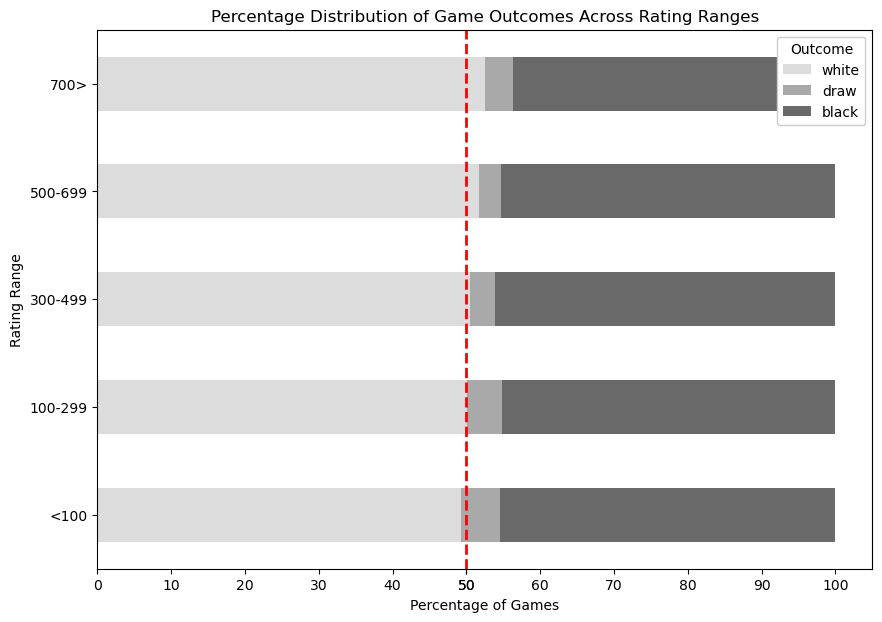

In [17]:
#Distribution of Game Outcomes Across Rating Ranges
count_data_1 = new_df_rating_1.groupby(['rating_difference_range', 'winner']).size().unstack().fillna(0)

count_data_1 = count_data_1[['white', 'draw', 'black']]

percentage_data_1 = count_data_1.div(count_data_1.sum(axis=1), axis=0) * 100

# Plotting the stacked horizontal bar chart with percentages
ax_1 = percentage_data_1.plot(kind='barh', stacked=True, figsize=(10, 7), color=['gainsboro', 'darkgrey', 'dimgray'])

plt.axvline(50, color='red', linestyle='--', lw=2)
plt.xticks(range(0, 101, 10))
plt.xticks(list(plt.xticks()[0]) + [50])
plt.xlabel('Percentage of Games')
plt.ylabel('Rating Range')
plt.title('Percentage Distribution of Game Outcomes Across Rating Ranges')
plt.legend(title='Outcome', facecolor='white', framealpha=1)
plt.show()

For the next chart, we will consider only the difference between Black and White if it is ≥ 100 points, as this will provide a clearer view of how rating affects the chances of winning. A difference of ±100 rating points is not significant and is generally considered to indicate approximately equal skill levels (based on many games I've played and observed).

Also, we consider only the "Black" and "White" variables for simplicity.

In [18]:
df_rating_2=df_chess[["winner","rating_difference"]]

df_rating_2["rating_helped"] = np.where(
    (df_rating_2["winner"] == "white") & (df_rating_2["rating_difference"] >=100), 0, 
    np.where((df_rating_2["winner"] == "black") & (df_rating_2["rating_difference"] <= -100), 0,
    np.where((df_rating_2["rating_difference"] < 100) & (df_rating_2["rating_difference"] > -100), 1,
             -1)
)
)
df_filtered = df_rating_2[df_rating_2["winner"].isin(["black", "white"])]
df_filtered

,winner,rating_difference,rating_helped
0,white,309,0
1,black,61,1
2,white,-4,1
3,white,-15,1
4,white,54,1
...,...,...,...
20053,white,471,0
20054,black,37,1
20055,white,-67,1
20056,white,133,0


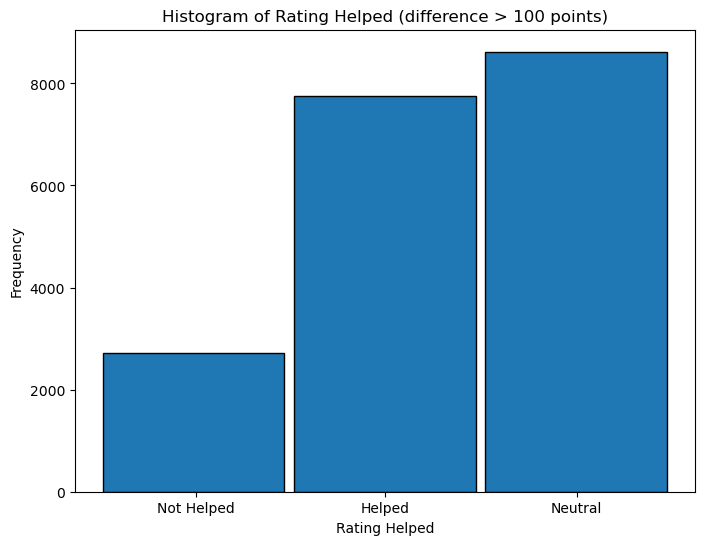

In [19]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(df_filtered["rating_helped"], bins=3, edgecolor='black',  rwidth=0.95)

plt.title('Histogram of Rating Helped (difference > 100 points)')
plt.xlabel('Rating Helped')
plt.ylabel('Frequency')
plt.xticks([-0.66, 0, 0.67], ['Not Helped', 'Helped', 'Neutral'])
plt.show()

It is clear that having a higher rating (more than 100 points) gives a significant advantage in winning a game. This information can be used in machine learning algorithms to predict winners. 

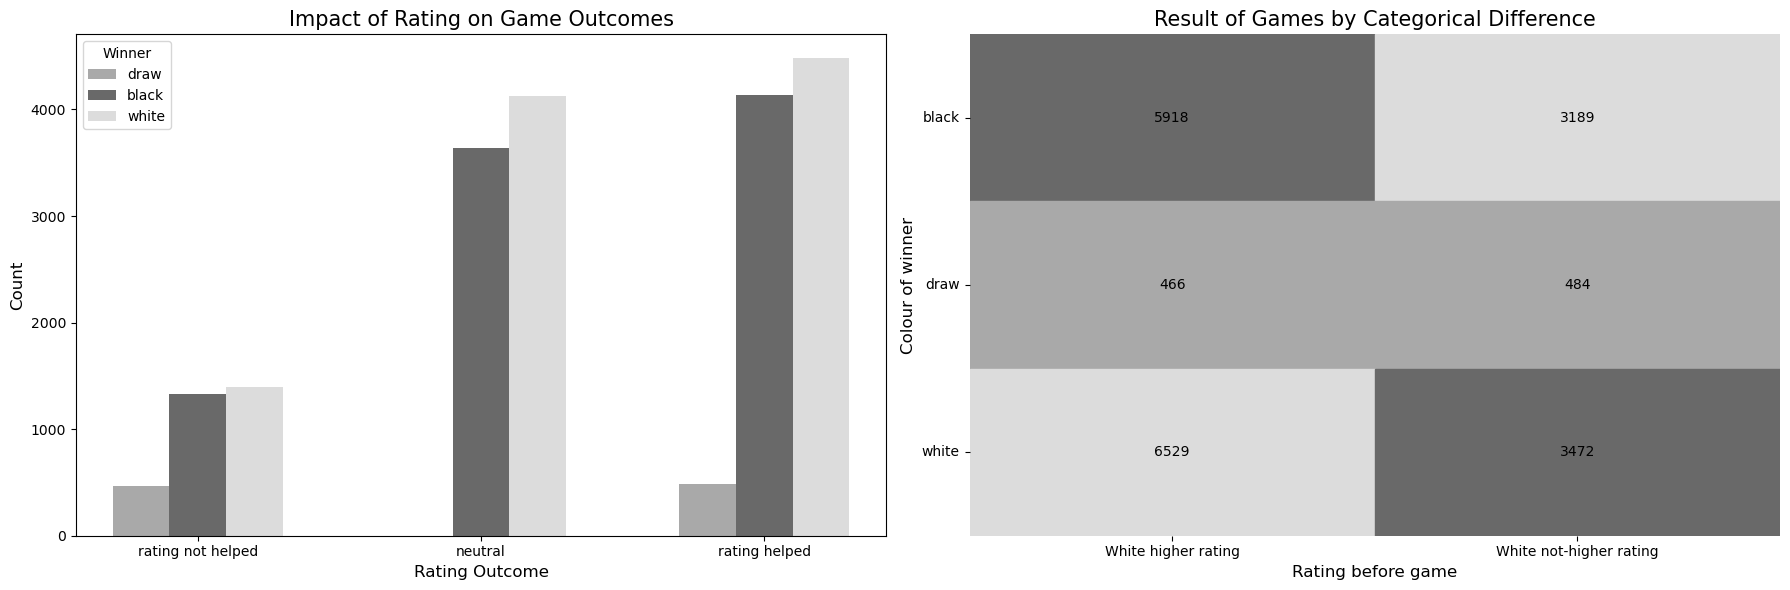

In [24]:
# First graph 
df_chess_dif = df_rating_2.groupby(['winner', 'rating_helped']).size().reset_index(name='count')
new_df_chess_dif = df_chess_dif[['winner', "count","rating_helped"]]
d = new_df_chess_dif.to_numpy()

categories = ['rating not helped', 'neutral', 'rating helped']
colors = {'draw': 'darkgrey', 'black': 'dimgray', 'white': 'gainsboro'}

values_dict = {
    'rating not helped': {'draw': 0, 'black': 0, 'white': 0},
    'neutral': {'draw': 0, 'black': 0, 'white': 0},
    'rating helped': {'draw': 0, 'black': 0, 'white': 0}
}

for row in d:
    if row[2] == -1:
        values_dict['rating not helped'][row[0]] += row[1]
    elif row[2] == 0:
        values_dict['neutral'][row[0]] += row[1]
    elif row[2] == 1:
        values_dict['rating helped'][row[0]] += row[1]

# Second graph 
df_chess['difference_text'] = df_chess['rating_difference'].apply(
    lambda x: 'White higher rating' if x > 0 else 'White not-higher rating'
)
new_df_chess_dif = df_chess.groupby(['difference_text', 'winner']).size().reset_index(name='count')

new_df_chess_dif.loc[
    (new_df_chess_dif['winner'] == 'black') & 
    (new_df_chess_dif['difference_text'] == 'White not-higher rating'), 'count'
] = 3189

new_df_chess_dif.loc[
    (new_df_chess_dif['winner'] == 'black') & 
    (new_df_chess_dif['difference_text'] == 'White higher rating'), 'count'
] = 5918

df_pivot = new_df_chess_dif.pivot(index='winner', columns='difference_text', values='count')

colors_heatmap = {
    ('white', 'White not-higher rating'): 'dimgray',
    ('white', 'White higher rating'): 'gainsboro',
    ('draw', 'White not-higher rating'): 'darkgrey',
    ('draw', 'White higher rating'): 'darkgrey',
    ('black', 'White higher rating'): 'dimgray',
    ('black', 'White not-higher rating'): 'gainsboro'
}

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

# First graph 
bar_width = 0.2
x = np.arange(len(categories))

for i, color in enumerate(['draw', 'black', 'white']):
    bar_values = [values_dict[category][color] for category in categories]
    ax1.bar(x + i*bar_width, bar_values, width=bar_width, color=colors[color], label=color)

ax1.set_xlabel('Rating Outcome', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_title('Impact of Rating on Game Outcomes', fontsize=15)
ax1.set_xticks(x + bar_width)
ax1.set_xticklabels(categories)
ax1.legend(title='Winner')

# Second graph
heatmap = sns.heatmap(df_pivot, annot=True, fmt='d', cmap='Greys', cbar=False, linewidths=.5, linecolor='black', 
                      annot_kws={"color": "black"}, ax=ax2)

for y in range(df_pivot.shape[0]):
    for x in range(df_pivot.shape[1]):
        key = (df_pivot.index[y], df_pivot.columns[x])
        heatmap.add_patch(plt.Rectangle((x, y), 1, 1, fill=True, color=colors_heatmap[key], edgecolor='black'))

ax2.set_title('Result of Games by Categorical Difference', fontsize=15)
ax2.set_xlabel('Rating before game', fontsize=12)
ax2.set_ylabel('Colour of winner', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)
plt.tight_layout()
plt.show()

These two pictures illustrate whether the higher-ranked player wins. The vertical axis represents the score, while the horizontal axis qualitatively reflects the ranking (i.e., whether the white player is ranked higher than the black player). In nearly 65% of cases, the higher-ranked player emerged victorious. Conversely, less than a third of the games were won by the player who was not favored according to the rankings. Draws, occurring in about 5% of the games, are equally likely regardless of whether the favored player is using the black or white pieces. This table reinforces the conclusion that the ranking points are more influential than the color of the pieces at the start of the game.

## Conclusion

According to the chess dataset, it is evident that white has a slight advantage over black opponents, considering the rating difference, distribution, and range. However, while color provides a small advantage, rating has a greater influence on the game than color alone. Specifically, if a player is more experienced (in our case, having a rating difference of over 100), they are likely to win with a good chance. Of course, since we are talking about chess, we cannot fully predict who will win, as many factors can come into play during the endgame (such as running out of time or an internet disconnection). However, general trends are clearly observable.

## Additional observation

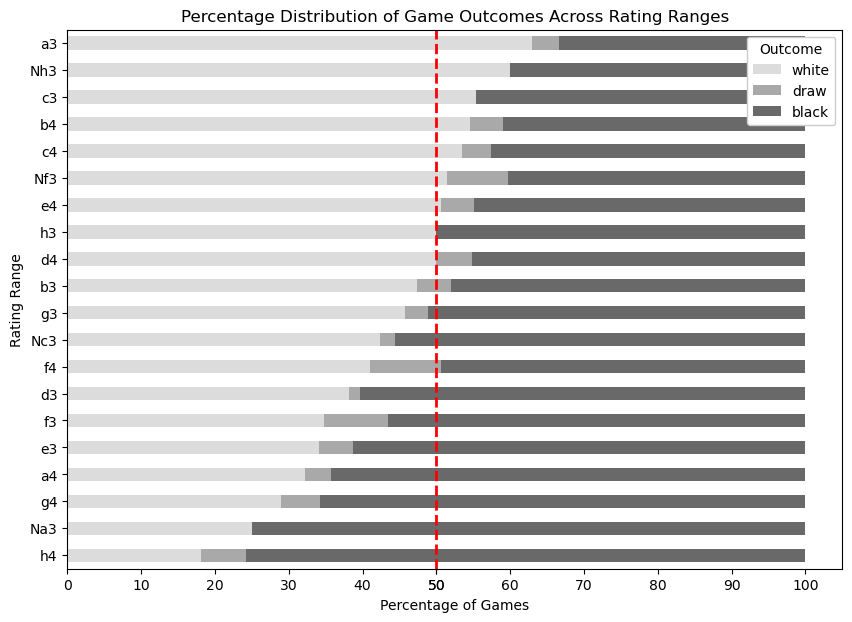

In [23]:
#Distribution of Game Outcomes Across Rating Ranges
df_chess_moves=df_chess[["moves","winner"]]
df_chess_moves['first_move'] = df_chess_moves['moves'].str.split().str[0]

count_data_2 = df_chess_moves.groupby(['first_move', 'winner']).size().unstack().fillna(0)

count_data_2 = count_data_2[['white', 'draw', 'black']]

# Convert counts to percentages
percentage_data_2 = count_data_2.div(count_data_2.sum(axis=1), axis=0) * 100
percentage_data_2 = percentage_data_2.sort_values(by='white', ascending=True)

# Plotting the stacked horizontal bar chart with percentages
ax_2 = percentage_data_2.plot(kind='barh', stacked=True, figsize=(10, 7), color=['gainsboro', 'darkgrey', 'dimgray'])

plt.axvline(50, color='red', linestyle='--', lw=2)
ax.set_facecolor('gray')
plt.xticks(range(0, 101, 10))
plt.xticks(list(plt.xticks()[0]) + [50])
plt.xlabel('Percentage of Games')
plt.ylabel('Rating Range')
plt.title('Percentage Distribution of Game Outcomes Across Rating Ranges')
plt.legend(title='Outcome', facecolor='white', framealpha=1)
ax.set_facecolor('gray')
plt.show()

It's very strange to me that White players who made moves like a3, Nh3, and c3 generally have more wins than Black. From my knowledge of chess, these moves are considered suboptimal. Maybe the dataset is not entirely accurate, or perhaps the players who made these kinds of moves had higher ratings than their opponents, allowing them to give Black an opportunity because they could still easily win due to their rating advantage. On the other hand, we see that bad moves like Na3 and h4 generally tend to result in losses for White against Black opponents. So, honestly, I don't fully understand this trend and find it confusing because, as I mentioned earlier, these moves are considered poor. The good moves, like d4 and e4, generally show an equal tendency with a slight advantage for White players, which aligns with what's generally considered true.

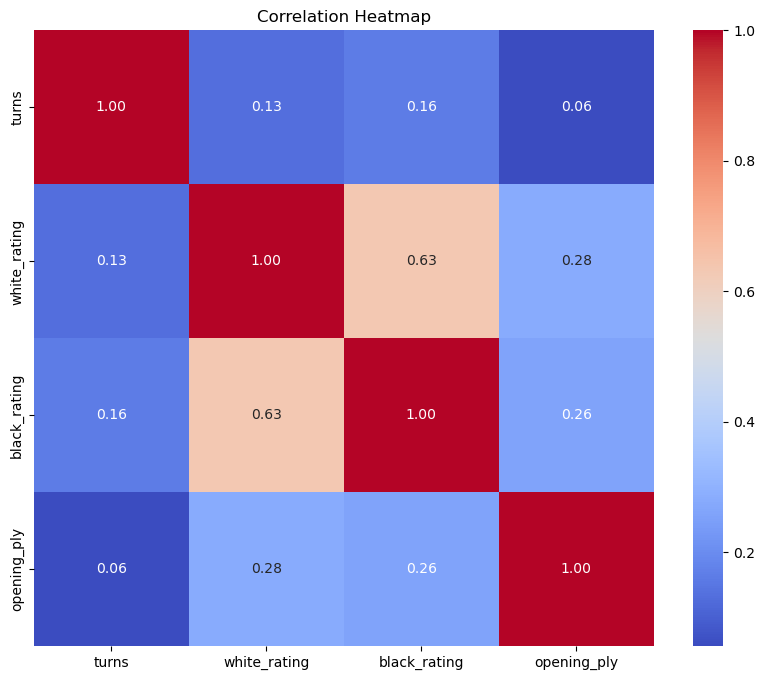

In [12]:
# Correlation heatmap
df_chess_n=pd.read_csv("games.csv")
df_chess_num = df_chess.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(df_chess_num.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

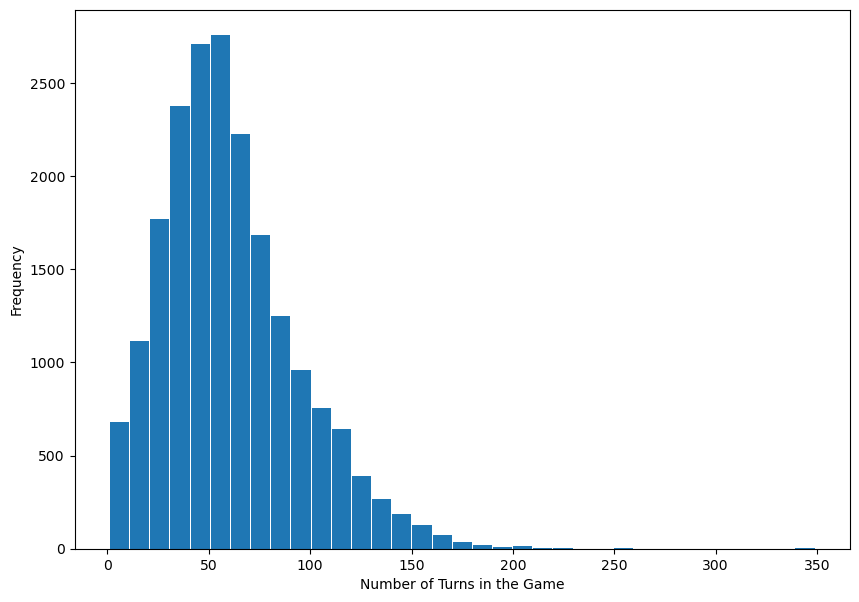

In [8]:
plt.figure(figsize=(10, 7))
plt.hist(df_chess['turns'], bins=35, rwidth=0.95);
plt.xlabel('Number of Turns in the Game')
plt.ylabel('Frequency')
plt.show()